# **Análise de Varejo**

# **1 - Conhecendo os dados**

São 3 datasets diferentes: Features, sales_date e stores.
Renomearemos sempre que necessário para facilitar o manuseio dos dados.
[Sobre o módulo calendar](https://www.logicus.com.br/alguns-exemplos-de-uso-de-calendario-com-python/)

In [2]:
#importando as bibliotecas necessárias
import numpy as np #operações e manipulações com dados
import pandas as pd #operações e manipulações com dados
import seaborn as sns #visualização dos dados
import matplotlib.pyplot as plt #visualização dos dados
import calendar 

## **data set features**

In [3]:
features = pd.read_csv("/Features data set.csv")

print(f'{features.shape[0]} linhas e {features.shape[1]} colunas')

features.head()

8190 linhas e 12 colunas


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Vamos renomear as colunas par nomes em português.


* Store - é a identificação da loja, ->loja.
* Date - data da semana, -> Data
* Temperature - temperatura na região,-> Temperatura
* Fuel_Price - preço do combustível na região, -> preço do combustível
* MarkDown1-5 -dados de descontos disponíveis a partir de 2011 e não o tempo todo nem para toda loja, valores ausentes marcados com NaN, -> Descontos
* CPI - consumer price index - índice de inplação no Brasil temos o IPCA- Índice Nacional de Preços ao COnsumidor amplo. -> IPC
* Unemployment - Taxa de Desemprego, -> desemprego
* IsHoliday - se na semana tem algum feriado importante,-> feriado

In [4]:
col_feat={'Store': "loja", 'Date': 'data', 'Temperature':'temperatura', 'Fuel_Price':'preco_combustivel', 'MarkDown1':'desc_1', 'MarkDown2':'desc_2',
       'MarkDown3':'desc_3','MarkDown4':"desc_4",'MarkDown5':'desc_5','MarkDown6':'desc_6', 'CPI':'IPC', 'Unemployment':'desemprego',
       'IsHoliday': 'feriado'}
features.rename(columns=col_feat, inplace=True)

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loja               8190 non-null   int64  
 1   data               8190 non-null   object 
 2   temperatura        8190 non-null   float64
 3   preco_combustivel  8190 non-null   float64
 4   desc_1             4032 non-null   float64
 5   desc_2             2921 non-null   float64
 6   desc_3             3613 non-null   float64
 7   desc_4             3464 non-null   float64
 8   desc_5             4050 non-null   float64
 9   IPC                7605 non-null   float64
 10  desemprego         7605 non-null   float64
 11  feriado            8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Nas células acima notamos que:
* a data está como object e precisamos passar para o formato de data
* e há vários valores nulos, into é, os valores não nulos são diferentes em cada coluna.

In [6]:
#valores faltantes
features.isna().sum()

loja                    0
data                    0
temperatura             0
preco_combustivel       0
desc_1               4158
desc_2               5269
desc_3               4577
desc_4               4726
desc_5               4140
IPC                   585
desemprego            585
feriado                 0
dtype: int64

In [7]:
#transformando os valores de data de object para formato de data
features['data'] = pd.to_datetime(features['data'])

features.data #está no formato datetime 

0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
8185   2013-06-28
8186   2013-05-07
8187   2013-12-07
8188   2013-07-19
8189   2013-07-26
Name: data, Length: 8190, dtype: datetime64[ns]

In [8]:
features.describe()

,loja,temperatura,preco_combustivel,desc_1,desc_2,desc_3,desc_4,desc_5,IPC,desemprego
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


Com a função describe() conseguimos obter algumas informações do data set
* total de 45 lojas
* média de temperatura em 23 graus (não sei se a escala é em ºF ou ºC
* Preço do combustível variou de 2,47 a 4,46 entre as regiões no perríodo 
* inflação foi de 126 a 228,9 no período
* taxa de desemprego variou de 3,68 a 14,31 com média de 7,826 no período

## **data set vendas**

In [9]:
vendas = pd.read_csv('/sales data-set.csv')
print(f'{vendas.shape[0]} linhas e {vendas.shape[1]} colunas')
vendas.head()

421570 linhas e 5 colunas


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


Faremos renomeação para o português também. Temos que tomar o cuidado de fazer a mesma alteração para manter a relação entre os data sets.
A novidade aqui são:
* a variável 'Weekly_sales' - Venda semanal em determinado departamento em determinada loja, -> vendas_semanal
* Dept é o departamento em determinada loja, manteremos Dept


In [11]:
vendas.rename(columns = {'Weekly_Sales':'vendas_semanal','Store': "loja",'IsHoliday': 'feriado', 'Date':'data'}, inplace = True)

In [12]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loja            421570 non-null  int64  
 1   Dept            421570 non-null  int64  
 2   data            421570 non-null  object 
 3   vendas_semanal  421570 non-null  float64
 4   feriado         421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


Obervamos que não valores nulos no dataset de vendas pois os números de colunas totais e non-null coincidem. Mas notamos que a data está como object e será melhor alterar isso também.

In [13]:
vendas['data'] = pd.to_datetime(vendas['data'])
vendas.data #está no formato de data

0        2010-05-02
1        2010-12-02
2        2010-02-19
3        2010-02-26
4        2010-05-03
            ...    
421565   2012-09-28
421566   2012-05-10
421567   2012-12-10
421568   2012-10-19
421569   2012-10-26
Name: data, Length: 421570, dtype: datetime64[ns]

In [14]:
vendas.describe()

,loja,Dept,vendas_semanal
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Observamos que:
* há 99 departamentos diferentes nas lojas (não necessariamente em todas há os 99)
* As vendas variam de -4988,94 a 693099 por semana, isso quer dizer que há pelo menos uma semana operou em prejuízo. 

## **data set lojas**

In [15]:
lojas = pd.read_csv('/stores data-set.csv')

print(f'{lojas.shape[0]} linhas e {lojas.shape[1]} colunas')

lojas.head()

45 linhas e 3 colunas


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


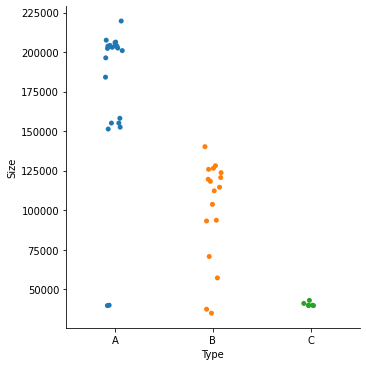

In [18]:
sns.catplot(x='Type',y='Size', data=lojas)

* Type é o Tipo de loja que pode ser A, B ou C, -> tipo 
* Size é o tamanho da loja, acredito que em metros quadrados, pelo gráfico notamos que o tipo de loja deva ter relação com o tamanho da loja ->tamanho

In [19]:
lojas.rename(columns={'Store':'loja', 'Type':"tipo",'Size':'tamanho'}, inplace=True)

In [20]:
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   loja     45 non-null     int64 
 1   tipo     45 non-null     object
 2   tamanho  45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [21]:
lojas.describe()

,loja,tamanho
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


# **2 - Visualização dos Dados**

Usaremos o histograma do matplotlib, dúvidas consulte a [biblioteca.](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)

## **2.1 - Vendas semanais para cada loja**

Text(0.04, 0.5, 'Número')

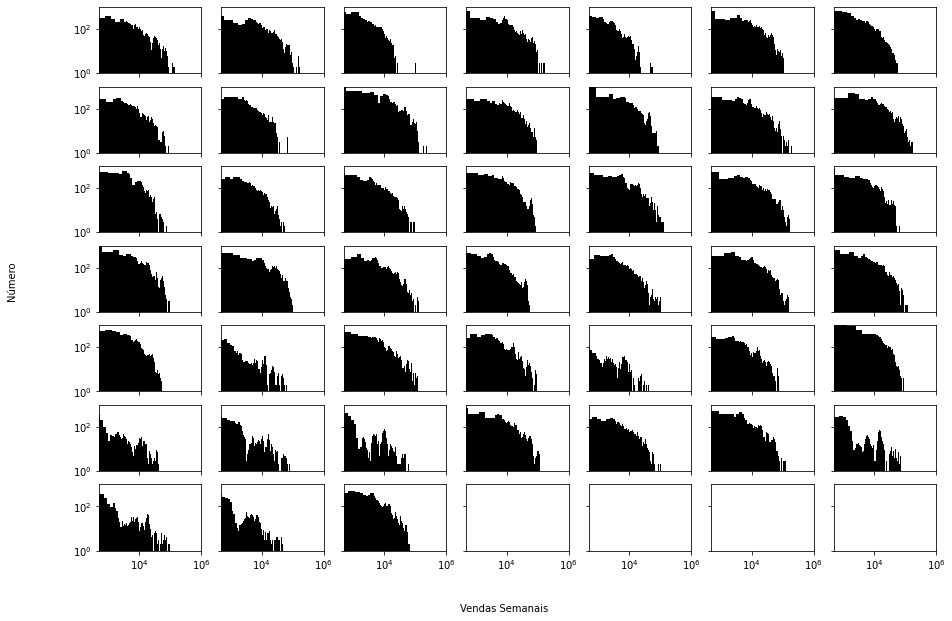

In [22]:
fig, eixo = plt.subplots(7, 7, sharex=True, sharey=True,figsize=(15,10))
s = 1
for i in range(0,7):
    for j in range(0,7):
        a = vendas['vendas_semanal'].loc[vendas['loja'] == s] #filtro a coluna de vendas semanal de cada loja s (1-45), se tiver dúvida printa essa linha fora do for.
        ax= eixo[i,j].hist(x=a, bins=500, color=['black'] ) #colocar o parêmetro bins muito alto leva mais tempo para o códio rodar
        eixo[i,j].set_yscale('log') #tentei com 'linear' e a melhor visualização foi com log
        eixo[i,j].set_xscale('log')
        eixo[i,j].set_ylim(1,1e3)
        eixo[i,j].set_xlim(5e2,1e6)

        s += 1

fig.text(0.5, 0.04, 'Vendas Semanais', ha='center')
fig.text(0.04, 0.5, 'Número', va='center', rotation='vertical')

## **2.2 - Vendas Semanais incluindo semanas com e sem feriados**

### Sem feriados

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.04, 0.5, 'Número Normalizados')

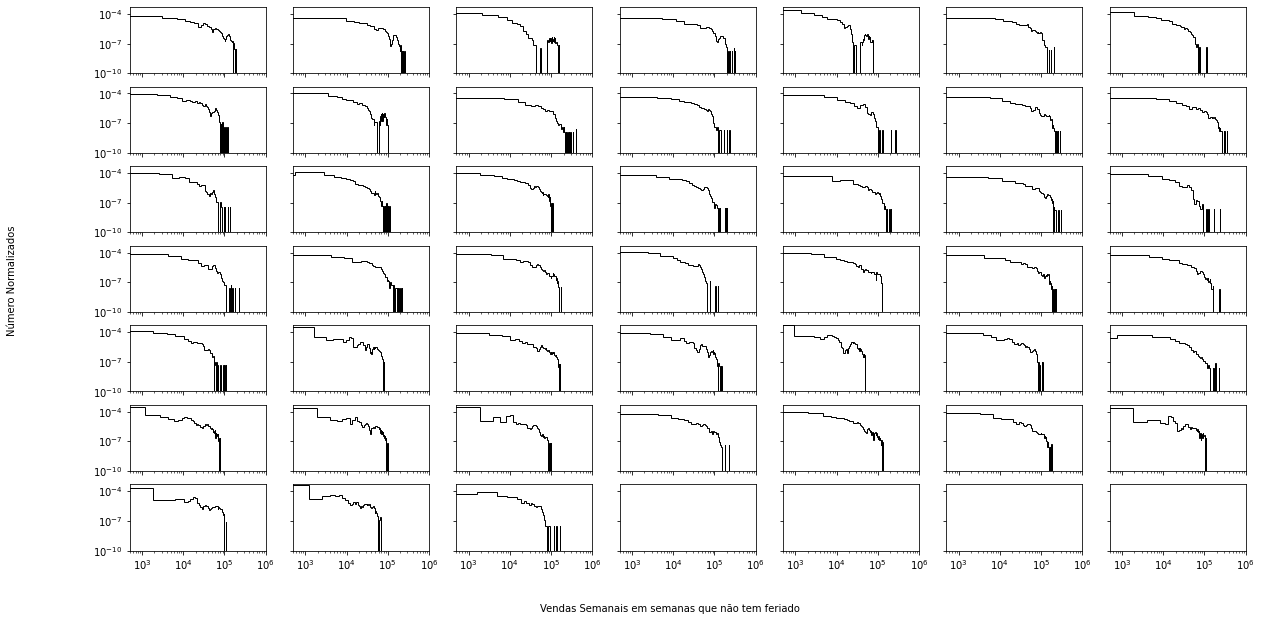

In [33]:
fig, eixo = plt.subplots(7,7, sharex=True, sharey=True, figsize=(20,10))
s=1

for i in range(0,7):
  for j in range(0,7):
    a= vendas['vendas_semanal'].loc[(vendas.loja == s) & (vendas.feriado == False)]
    ax = eixo[i,j].hist(x=a, bins=50, color ='black', density=True,  histtype='step')
    eixo[i,j].set_yscale('log')
    eixo[i,j].set_xscale('log')
    eixo[i,j].set_ylim(1e-10,5e-4)
    eixo[i,j].set_xlim(5e2,1e6)

    s += 1
fig.text(0.5, 0.04, 'Vendas Semanais em semanas que não tem feriado', ha='center')
fig.text(0.04, 0.5, 'Número Normalizados', va='center', rotation='vertical')


### com feriados

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0.04, 0.5, 'Número Normalizados')

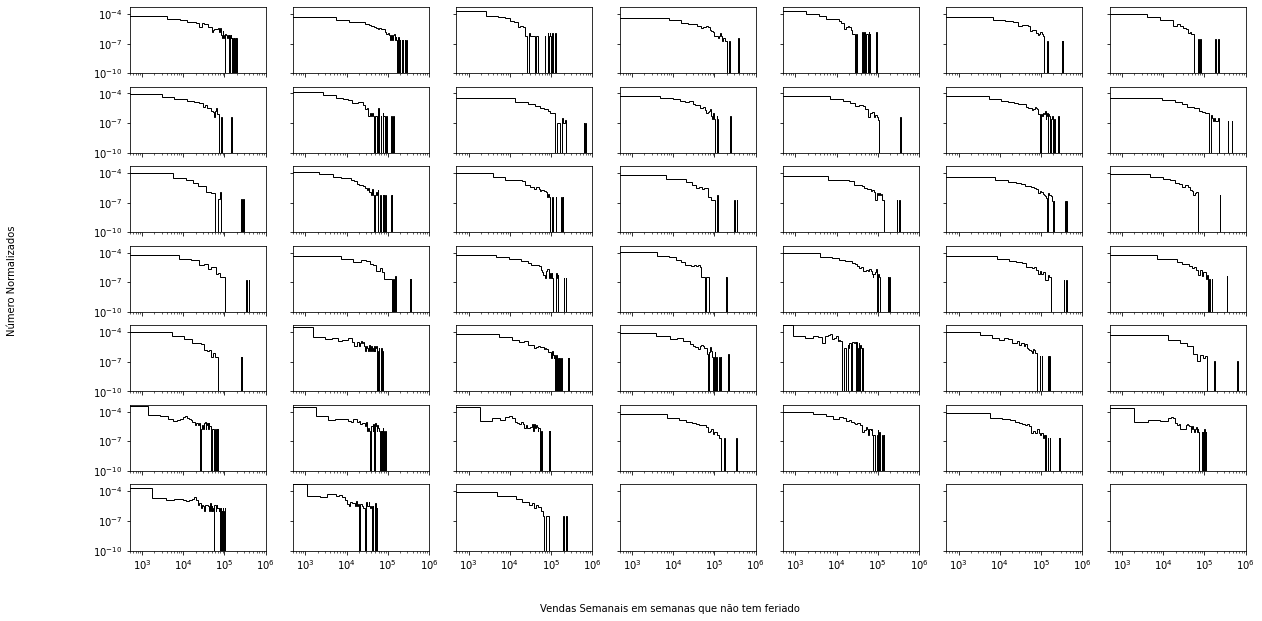

In [34]:
fig, eixo = plt.subplots(7,7, sharex=True, sharey=True, figsize=(20,10))
s=1

for i in range(0,7):
  for j in range(0,7):
    a= vendas['vendas_semanal'].loc[(vendas.loja == s) & (vendas.feriado == True)] #só alterar para True em relação ao códogo anterior
    ax = eixo[i,j].hist(x=a, bins=50, color ='black', density=True,  histtype='step')
    eixo[i,j].set_yscale('log')
    eixo[i,j].set_xscale('log')
    eixo[i,j].set_ylim(1e-10,5e-4)
    eixo[i,j].set_xlim(5e2,1e6)

    s += 1
fig.text(0.5, 0.04, 'Vendas Semanais em semanas que não tem feriado', ha='center')
fig.text(0.04, 0.5, 'Número Normalizados', va='center', rotation='vertical')

### Comparando as vendas com e sem feriado

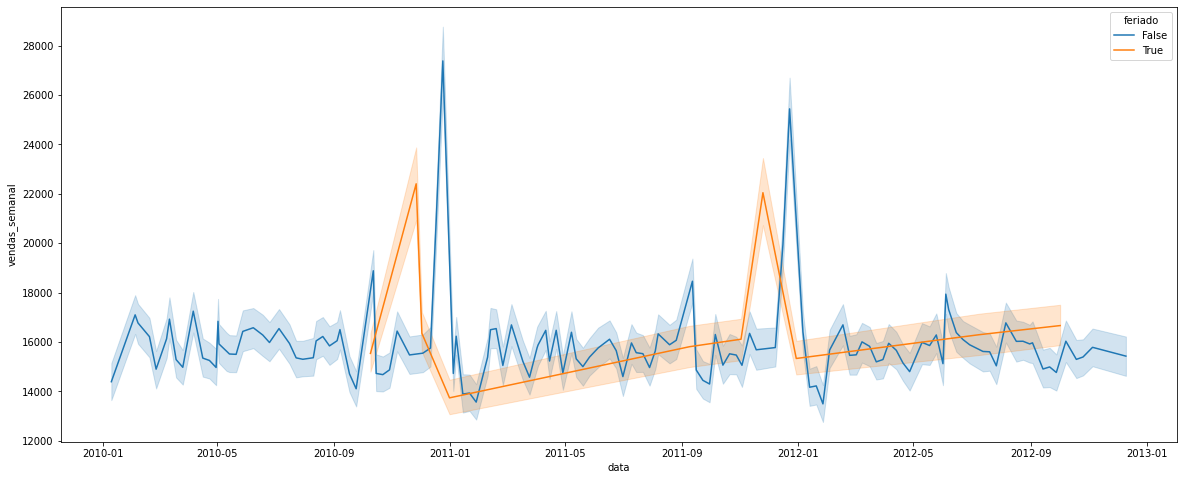

In [65]:
plt.figure(figsize=(20,8))

sns.lineplot(x='data', y='vendas_semanal', data=vendas, hue='feriado')


## **2.3 - Distribuição de vendas mensal para a loja 1 de maior faturamento loja incluindo todos os departamentos**

Text(0.04, 0.5, 'Number')

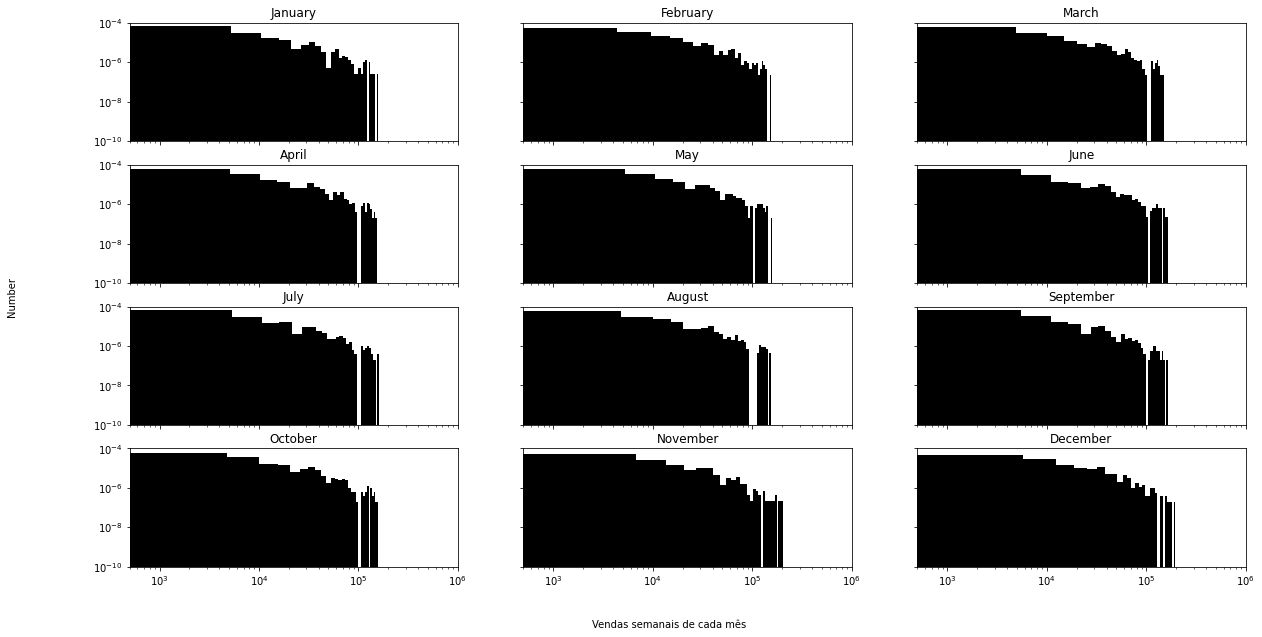

In [69]:
fig, eixo= plt.subplots(4, 3, sharex=True, sharey=True,figsize=(20,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        a =vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.month == m)]#filtros nos meses

        ax= eixo[i,j].hist(x=a, bins=30, density=True, color='black')
        eixo[i,j].set_yscale('log')
        eixo[i,j].set_xscale('log')
        eixo[i,j].set_xlim(5e2,1e6)
        eixo[i,j].set_ylim(1e-10,1e-4)
        eixo[i,j].set_title('%s'%calendar.month_name[m])
        m += 1
        #s+=1 #se quiser fazer para todas as lojas
fig.text(0.5, 0.04, 'Vendas semanais de cada mês', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

## **2.4 - Distribuição mensal por loja 1  em 2010,2011, 2012**

Text(0.04, 0.5, 'Number')

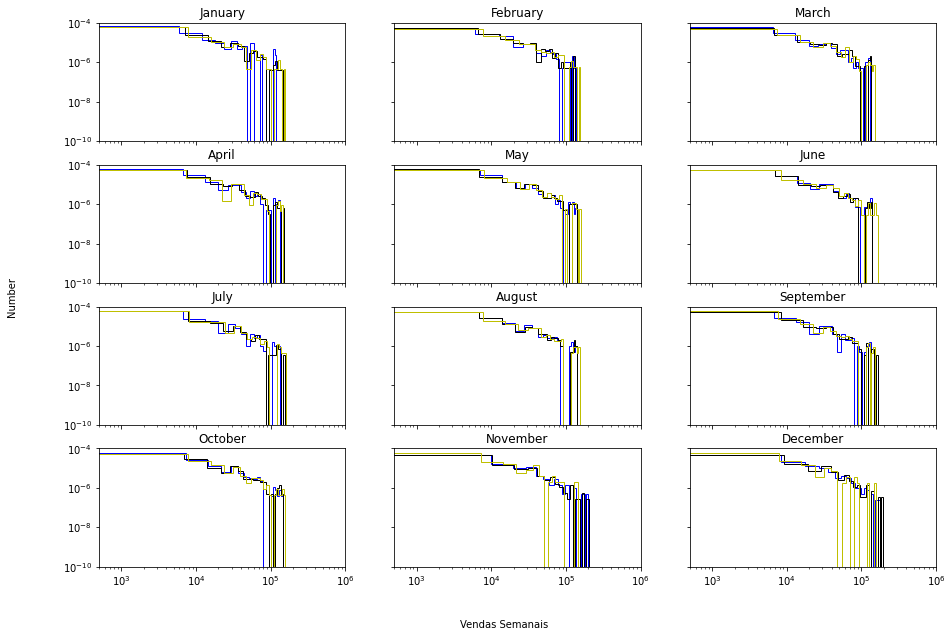

In [91]:
fig, eixo = plt.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):

        a = vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.year == 2010) & (vendas.data.dt.month == m)]      
        ax = eixo[i,j].hist(a, 20, color='b', histtype='step', density=True)

        b = vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.year == 2011) & (vendas.data.dt.month == m)]
        ax = eixo[i,j].hist(b , 20, color='black',histtype='step', density=True)

        c = vendas.vendas_semanal.loc[(vendas.loja == s) & (vendas.data.dt.year == 2012) & (vendas.data.dt.month == m)]
        ax = eixo[i,j].hist(c, 20, color='y', histtype='step', density=True);

        eixo[i,j].set_yscale('log')
        eixo[i,j].set_xscale('log')
        eixo[i,j].set_ylim(1e-10,1e-4)
        eixo[i,j].set_xlim(5e2,1e6)
        eixo[i,j].set_title('%s'%calendar.month_name[m])
        m += 1
        #s += 1
fig.text(0.5, 0.04, 'Vendas Semanais', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')